In [1]:
import math

import pandas as pd

#df1 = pd.read_excel("./data/anon_WMSPick20250101_03.xlsx") # Slechte data: timestamps kloppen niet
df2 = pd.read_excel("./data/anon_WMSPick20250104_06.xlsx")
df3 = pd.read_excel("./data/anon_WMSPick20250107_09.xlsx")
#df4 = pd.read_excel("./data/anon_WMSPick20250110_12.xlsx") # idem
df5 = pd.read_excel("./data/anon_WMSPick20250113_15.xlsx")
df6 = pd.read_excel("./data/anon_WMSPick20250116_19.xlsx")

dfs=[df2,df3,df5,df6]
df=pd.concat(dfs)
df = df[df['Out in'] != 'Outgoing']
df


,Inventory Trans Number,Assc Inventory Trans Number,Task number,Sequence number,Creation Dt,Last Change Dt,Requester user code,Trans Type,Out in,Location code,...,Stock Product Id,Handling unit code,Inventory Qty,Reference Trans Number,Outbound order number,Outbound Order Line Number,Task list number,Picklist number,Picklist line number,Product code7
1,114279213,114279212.0,14298323.0,1.0,2025-01-04 06:00:00.033,2025-01-04 06:00:00.087,24,Picking SKU,Incoming,OSR,...,267475.0,ST,1,NaN,1177094.0,3.0,NaN,2133194.0,3.0,NaN
3,114279215,114279214.0,14298324.0,1.0,2025-01-04 06:00:00.507,2025-01-04 06:00:00.527,24,Picking SKU,Incoming,OSR,...,267476.0,ST,1,NaN,1177094.0,4.0,NaN,2133194.0,4.0,NaN
5,114279217,114279216.0,14298325.0,1.0,2025-01-04 06:00:00.577,2025-01-04 06:00:00.587,24,Picking SKU,Incoming,OSR,...,267477.0,ST,1,NaN,1177094.0,5.0,NaN,2133194.0,5.0,NaN
7,114279219,114279218.0,14298326.0,1.0,2025-01-04 06:00:00.653,2025-01-04 06:00:00.680,24,Picking SKU,Incoming,OSR,...,267478.0,ST,1,NaN,1177094.0,6.0,NaN,2133194.0,6.0,NaN
9,114279221,114279220.0,14298327.0,1.0,2025-01-04 06:00:00.747,2025-01-04 06:00:00.760,5,Picking SKU,Incoming,OSR,...,268118.0,ST,1,NaN,1177094.0,7.0,NaN,2133194.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149891,117106634,117106633.0,14633495.0,1.0,2025-01-19 17:57:13.833,2025-01-19 17:57:13.833,4,Picking SKU,Incoming,PTL-NEST14,...,816354.0,ST,1,NaN,1201324.0,7.0,NaN,2173261.0,7.0,NaN
149893,117106638,117106637.0,14633500.0,1.0,2025-01-19 17:57:13.923,2025-01-19 17:57:13.927,4,Picking SKU,Incoming,PTL-NEST23,...,816369.0,ST,1,NaN,1201324.0,12.0,NaN,2173261.0,12.0,NaN
149895,117106640,117106639.0,14633519.0,1.0,2025-01-19 17:57:13.990,2025-01-19 17:57:13.990,4,Picking SKU,Incoming,PTL-NEST23,...,798581.0,ST,1,NaN,1201324.0,31.0,NaN,2173261.0,31.0,NaN
149897,117106644,117106643.0,14633807.0,1.0,2025-01-19 17:57:14.100,2025-01-19 17:57:14.100,4,Picking SKU,Incoming,PTL-NEST14,...,816343.0,ST,1,NaN,1201324.0,2.0,NaN,2173261.0,2.0,NaN


In [2]:
loc_df = df[df['Location code'] == "OSR"]
loc_df

,Inventory Trans Number,Assc Inventory Trans Number,Task number,Sequence number,Creation Dt,Last Change Dt,Requester user code,Trans Type,Out in,Location code,...,Stock Product Id,Handling unit code,Inventory Qty,Reference Trans Number,Outbound order number,Outbound Order Line Number,Task list number,Picklist number,Picklist line number,Product code7
1,114279213,114279212.0,14298323.0,1.0,2025-01-04 06:00:00.033,2025-01-04 06:00:00.087,24,Picking SKU,Incoming,OSR,...,267475.0,ST,1,NaN,1177094.0,3.0,NaN,2133194.0,3.0,NaN
3,114279215,114279214.0,14298324.0,1.0,2025-01-04 06:00:00.507,2025-01-04 06:00:00.527,24,Picking SKU,Incoming,OSR,...,267476.0,ST,1,NaN,1177094.0,4.0,NaN,2133194.0,4.0,NaN
5,114279217,114279216.0,14298325.0,1.0,2025-01-04 06:00:00.577,2025-01-04 06:00:00.587,24,Picking SKU,Incoming,OSR,...,267477.0,ST,1,NaN,1177094.0,5.0,NaN,2133194.0,5.0,NaN
7,114279219,114279218.0,14298326.0,1.0,2025-01-04 06:00:00.653,2025-01-04 06:00:00.680,24,Picking SKU,Incoming,OSR,...,267478.0,ST,1,NaN,1177094.0,6.0,NaN,2133194.0,6.0,NaN
9,114279221,114279220.0,14298327.0,1.0,2025-01-04 06:00:00.747,2025-01-04 06:00:00.760,5,Picking SKU,Incoming,OSR,...,268118.0,ST,1,NaN,1177094.0,7.0,NaN,2133194.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149463,117105618,117105617.0,14624574.0,1.0,2025-01-19 17:36:49.557,2025-01-19 17:36:49.560,43,Picking SKU,Incoming,OSR,...,837445.0,ST,1,NaN,1201390.0,45.0,NaN,2173406.0,7.0,NaN
149465,117105620,117105619.0,14624576.0,1.0,2025-01-19 17:36:49.623,2025-01-19 17:36:49.623,43,Picking SKU,Incoming,OSR,...,837447.0,ST,1,NaN,1201390.0,47.0,NaN,2173406.0,9.0,NaN
149467,117105622,117105621.0,14624577.0,1.0,2025-01-19 17:36:49.690,2025-01-19 17:36:49.703,43,Picking SKU,Incoming,OSR,...,816600.0,ST,1,NaN,1201390.0,1.0,NaN,2173406.0,10.0,NaN
149469,117105624,117105623.0,14624579.0,1.0,2025-01-19 17:36:49.760,2025-01-19 17:36:49.763,43,Picking SKU,Incoming,OSR,...,816626.0,ST,1,NaN,1201390.0,3.0,NaN,2173406.0,12.0,NaN


In [3]:
import numpy as np
columns = loc_df.columns.tolist() + ['delta']
row_array = []
prev_time_dict = {}
for row in loc_df.itertuples(index=False):
    req_user_code = row[6]
    prev_time = prev_time_dict[req_user_code] if req_user_code in prev_time_dict else None
    if prev_time is None:
        prev_time = row[5]
        prev_time_dict[req_user_code] = prev_time
    else:
        delta = (row[5] - prev_time).total_seconds()
        qty = row[14]

        prev_time = row[5]
        prev_time_dict[req_user_code] = prev_time
        if delta > 100:
            continue
        if delta < 0:
            continue
        delta /= qty
        row_dict = {}
        for i in range(len(columns) - 1):
            row_dict[columns[i]] = row[i]
        row_dict['delta'] = delta
        row_array.append(row_dict)

deltad_df = pd.DataFrame(row_array, columns=loc_df.columns.tolist() + ['delta'])
deltad_df

,Inventory Trans Number,Assc Inventory Trans Number,Task number,Sequence number,Creation Dt,Last Change Dt,Requester user code,Trans Type,Out in,Location code,...,Handling unit code,Inventory Qty,Reference Trans Number,Outbound order number,Outbound Order Line Number,Task list number,Picklist number,Picklist line number,Product code7,delta
0,114279215,114279214.0,14298324.0,1.0,2025-01-04 06:00:00.507,2025-01-04 06:00:00.527,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,4.0,NaN,2133194.0,4.0,NaN,0.440
1,114279217,114279216.0,14298325.0,1.0,2025-01-04 06:00:00.577,2025-01-04 06:00:00.587,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,5.0,NaN,2133194.0,5.0,NaN,0.060
2,114279219,114279218.0,14298326.0,1.0,2025-01-04 06:00:00.653,2025-01-04 06:00:00.680,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,6.0,NaN,2133194.0,6.0,NaN,0.093
3,114279223,114279222.0,14298328.0,1.0,2025-01-04 06:00:00.823,2025-01-04 06:00:00.853,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,8.0,NaN,2133194.0,8.0,NaN,0.173
4,114279225,114279224.0,14298332.0,1.0,2025-01-04 06:00:00.940,2025-01-04 06:00:00.977,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,12.0,NaN,2133194.0,12.0,NaN,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84494,117105618,117105617.0,14624574.0,1.0,2025-01-19 17:36:49.557,2025-01-19 17:36:49.560,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,45.0,NaN,2173406.0,7.0,NaN,0.077
84495,117105620,117105619.0,14624576.0,1.0,2025-01-19 17:36:49.623,2025-01-19 17:36:49.623,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,47.0,NaN,2173406.0,9.0,NaN,0.063
84496,117105622,117105621.0,14624577.0,1.0,2025-01-19 17:36:49.690,2025-01-19 17:36:49.703,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,1.0,NaN,2173406.0,10.0,NaN,0.080
84497,117105624,117105623.0,14624579.0,1.0,2025-01-19 17:36:49.760,2025-01-19 17:36:49.763,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,3.0,NaN,2173406.0,12.0,NaN,0.060


In [4]:
expanded_deltad_df = deltad_df.loc[deltad_df.index.repeat(deltad_df['Inventory Qty'])].reset_index(drop=True)
expanded_deltad_df

,Inventory Trans Number,Assc Inventory Trans Number,Task number,Sequence number,Creation Dt,Last Change Dt,Requester user code,Trans Type,Out in,Location code,...,Handling unit code,Inventory Qty,Reference Trans Number,Outbound order number,Outbound Order Line Number,Task list number,Picklist number,Picklist line number,Product code7,delta
0,114279215,114279214.0,14298324.0,1.0,2025-01-04 06:00:00.507,2025-01-04 06:00:00.527,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,4.0,NaN,2133194.0,4.0,NaN,0.440
1,114279217,114279216.0,14298325.0,1.0,2025-01-04 06:00:00.577,2025-01-04 06:00:00.587,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,5.0,NaN,2133194.0,5.0,NaN,0.060
2,114279219,114279218.0,14298326.0,1.0,2025-01-04 06:00:00.653,2025-01-04 06:00:00.680,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,6.0,NaN,2133194.0,6.0,NaN,0.093
3,114279223,114279222.0,14298328.0,1.0,2025-01-04 06:00:00.823,2025-01-04 06:00:00.853,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,8.0,NaN,2133194.0,8.0,NaN,0.173
4,114279225,114279224.0,14298332.0,1.0,2025-01-04 06:00:00.940,2025-01-04 06:00:00.977,24,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177094.0,12.0,NaN,2133194.0,12.0,NaN,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98160,117105618,117105617.0,14624574.0,1.0,2025-01-19 17:36:49.557,2025-01-19 17:36:49.560,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,45.0,NaN,2173406.0,7.0,NaN,0.077
98161,117105620,117105619.0,14624576.0,1.0,2025-01-19 17:36:49.623,2025-01-19 17:36:49.623,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,47.0,NaN,2173406.0,9.0,NaN,0.063
98162,117105622,117105621.0,14624577.0,1.0,2025-01-19 17:36:49.690,2025-01-19 17:36:49.703,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,1.0,NaN,2173406.0,10.0,NaN,0.080
98163,117105624,117105623.0,14624579.0,1.0,2025-01-19 17:36:49.760,2025-01-19 17:36:49.763,43,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201390.0,3.0,NaN,2173406.0,12.0,NaN,0.060


In [5]:
subset_specific_item = expanded_deltad_df[expanded_deltad_df['Item code'] == 625]
subset_specific_item

,Inventory Trans Number,Assc Inventory Trans Number,Task number,Sequence number,Creation Dt,Last Change Dt,Requester user code,Trans Type,Out in,Location code,...,Handling unit code,Inventory Qty,Reference Trans Number,Outbound order number,Outbound Order Line Number,Task list number,Picklist number,Picklist line number,Product code7,delta
2258,114310780,114310779.0,14305530.0,1.0,2025-01-04 09:10:45.220,2025-01-04 09:10:45.223,37,Picking SKU,Incoming,OSR,...,ST,1,NaN,1177179.0,38.0,NaN,2133268.0,22.0,NaN,0.063
5688,114389569,114389568.0,14313915.0,1.0,2025-01-04 17:15:57.657,2025-01-04 17:15:57.663,44,Picking SKU,Incoming,OSR,...,ST,1,NaN,1179166.0,1.0,NaN,2136193.0,2.0,NaN,0.076
6468,114404157,114404156.0,14313750.0,1.0,2025-01-05 06:54:21.043,2025-01-05 06:54:21.047,38,Picking SKU,Incoming,OSR,...,ST,1,NaN,1179143.0,1.0,NaN,2136149.0,1.0,NaN,11.287
7345,114419230,114419229.0,14305799.0,1.0,2025-01-05 08:25:17.360,2025-01-05 08:25:17.363,38,Picking SKU,Incoming,OSR,...,ST,1,NaN,1178245.0,16.0,NaN,2134409.0,16.0,NaN,0.063
7809,114431020,114431019.0,14319585.0,1.0,2025-01-05 09:51:51.670,2025-01-05 09:51:51.680,38,Picking SKU,Incoming,OSR,...,ST,1,NaN,1180106.0,10.0,NaN,2137450.0,10.0,NaN,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76878,116563577,116563576.0,14569209.0,1.0,2025-01-16 15:55:45.040,2025-01-16 15:55:45.050,61,Picking SKU,Incoming,OSR,...,ST,1,NaN,1200168.0,2.0,NaN,2171584.0,2.0,NaN,0.190
79484,116648914,116648913.0,14577692.0,1.0,2025-01-16 21:30:10.250,2025-01-16 21:30:10.257,48,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201008.0,2.0,NaN,2172941.0,2.0,NaN,0.080
79514,116649430,116649429.0,14577857.0,1.0,2025-01-16 21:32:20.970,2025-01-16 21:32:20.983,48,Picking SKU,Incoming,OSR,...,ST,1,NaN,1201247.0,1.0,NaN,2172945.0,3.0,NaN,0.060
84916,116776980,116776979.0,14592842.0,1.0,2025-01-17 14:40:12.283,2025-01-17 14:40:12.293,48,Picking SKU,Incoming,OSR,...,ST,1,NaN,1202821.0,11.0,NaN,2175670.0,10.0,NaN,0.063


In [6]:
deltad_grouping_item = expanded_deltad_df[['Item code', 'delta']].groupby('Item code').agg({'delta': ['mean', 'std', 'count']})
deltad_grouping_item.columns = ['_'.join(col).strip() for col in deltad_grouping_item.columns.values]
deltad_grouping_item.reset_index(inplace=True)
deltad_grouping_item

,Item code,delta_mean,delta_std,delta_count
0,0,0.622171,2.157395,41
1,1,0.060000,NaN,1
2,2,0.056600,0.032231,10
3,3,1.645167,1.712008,6
4,4,2.021906,4.801286,32
...,...,...,...,...
9761,29352,2.761125,9.678399,24
9762,29353,2.946000,5.798039,4
9763,29354,0.058250,0.021077,4
9764,29355,5.560091,15.256564,11


In [7]:
deltad_grouping_item[deltad_grouping_item['Item code'] == 1000]

,Item code,delta_mean,delta_std,delta_count
463,1000,8.182228,20.444431,79


In [8]:
expanded = deltad_grouping_item.loc[deltad_grouping_item.index.repeat(deltad_grouping_item['delta_count'])].reset_index(drop=True)
expanded

,Item code,delta_mean,delta_std,delta_count
0,0,0.622171,2.157395,41
1,0,0.622171,2.157395,41
2,0,0.622171,2.157395,41
3,0,0.622171,2.157395,41
4,0,0.622171,2.157395,41
...,...,...,...,...
98160,29369,0.079750,0.005523,8
98161,29369,0.079750,0.005523,8
98162,29369,0.079750,0.005523,8
98163,29369,0.079750,0.005523,8


In [9]:
# get average delta mean
expanded['delta_mean'].mean()

np.float64(4.517409463658127)

0        0.622171
1        0.622171
2        0.622171
3        0.622171
4        0.622171
           ...   
98152    5.560091
98153    5.560091
98154    5.560091
98155    5.560091
98156    5.560091
Name: delta_mean, Length: 83902, dtype: float64


/tmp/ipykernel_23577/4171752264.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(-(x)*scale) * scale *mult


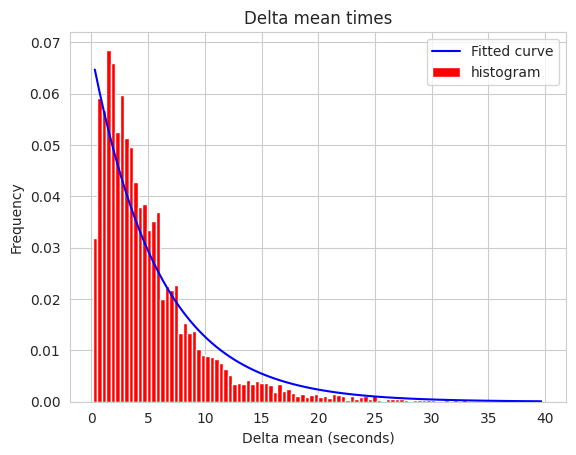

Expected sum: 1.0000000000000007
Observed sum: 1.0
Observed: [3.19062716e-02 5.92476937e-02 5.68639603e-02 6.85561727e-02
 6.60174966e-02 5.25255655e-02 5.96886844e-02 5.13932922e-02
 4.95697361e-02 4.28595266e-02 3.78656051e-02 3.85330505e-02
 3.34080236e-02 3.51958237e-02 3.68644371e-02 1.99637673e-02
 2.24905247e-02 2.18230793e-02 2.27884913e-02 1.33131511e-02
 1.52439751e-02 1.33846631e-02 1.38018164e-02 1.02262163e-02
 9.07010560e-03 8.96283760e-03 8.65295225e-03 8.29539224e-03
 7.50876022e-03 6.35264952e-03 5.24421349e-03 3.52792544e-03
 3.58751877e-03 3.50408810e-03 4.32647613e-03 3.39682010e-03
 4.12385879e-03 3.55176277e-03 3.69478678e-03 3.31338943e-03
 1.84739339e-03 3.38490143e-03 2.12152273e-03 2.47908274e-03
 1.65669472e-03 1.08459870e-03 1.51367071e-03 1.01308670e-03
 1.40640271e-03 1.43024004e-03 8.34306691e-04 1.02500536e-03
 7.74713356e-04 1.46599604e-03 1.38256537e-03 1.02500536e-03
 4.29072013e-04 1.07268003e-03 5.24421349e-04 8.34306691e-04
 1.15611070e-03 5.244213

In [42]:
from scipy.stats import gamma, chisquare, chi2
from scipy.optimize import curve_fit
import math
# get a histogram from expanded
import matplotlib.pyplot as plt

def exp_pdf(x, scale, mult):
    return np.exp(-(x)*scale) * scale *mult

corrected_means = expanded['delta_mean']
corrected_means =corrected_means[(corrected_means > 0.1) & (corrected_means < 40)]
print(corrected_means)


# create histgram data
bin_heights, bin_borders = np.histogram(corrected_means, bins=100)
bin_widths = np.diff(bin_borders)
norm_bin_heights = bin_heights / (sum(bin_heights))
bin_centers = bin_borders[:-1] + bin_widths / 2
# fit gamma distribution
params, _ = curve_fit(exp_pdf, bin_centers, bin_heights)
# plot histogram and gamma distribution
nonorm_expected_values = exp_pdf(bin_centers, *params)
expected_values = nonorm_expected_values / sum(nonorm_expected_values)
plt.bar(bin_centers, norm_bin_heights, width=bin_widths, label='histogram', color="red")

# Plot the data and the fitted curve
plt.plot(bin_centers, expected_values, label='Fitted curve', color='blue')
plt.legend()
plt.xlabel('Delta mean (seconds)')
plt.ylabel('Frequency')
plt.title('Delta mean times')
plt.show()

## chi squared test
expected = expected_values
observed = norm_bin_heights
print(f"Expected sum: {sum(expected)}")
print(f"Observed sum: {sum(observed)}")
print(f"Observed: {observed}")
print(f"Expected: {expected}")

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"p-value: {p_value}")
print(f"chi2_stat: {chi2_stat}")
p_calc = 1 - chi2.cdf(chi2_stat, df=3)
print(f"p_calc: {p_calc}")
print(f"params: {params}")


5.958203741813897


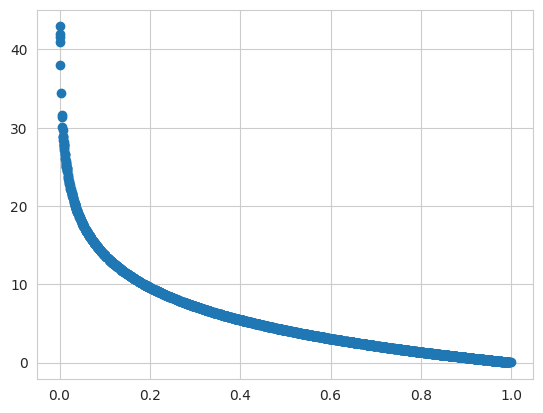

In [39]:
lambda_param = 1.67974217e-01
def exp_transform(x):
    return (-1/lambda_param) * np.log(x)


random_x_values = []
random_y_values = []
for _ in range(0, 2000):
    random_x = np.random.random_sample()
    random_x_values.append(random_x)
    random_y_values.append(exp_transform(random_x))

# plot
import matplotlib.pyplot as plt
plt.scatter(random_x_values, random_y_values, label='random values')

print(sum(random_y_values)/len(random_y_values))